In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Data

In [2]:
data = pd.read_csv('../input/iris/Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
sepal_X = data[['SepalLengthCm', 'SepalWidthCm']]
petal_X = data[['PetalLengthCm', 'PetalWidthCm']]
y = data['Species'].astype("category").cat.codes
num_cat = y.nunique()
categories = data['Species'].astype("category").cat.categories
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model

In [6]:
scores = {}
scores_list = []
for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = accuracy_score(y_test, y_pred)
    scores_list.append(scores[k])

# Analysis

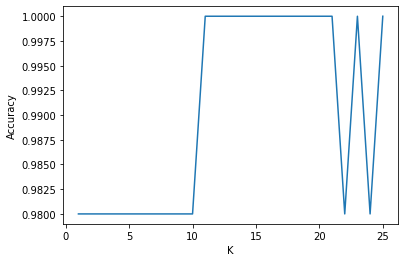

In [7]:
plt.plot(range(1, 26), scores_list)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Confusion Matrix") 
print(confusion_matrix(y_test, y_pred))
print(f"Correct Predictions: {accuracy_score(y_test, y_pred)}")
print(f"Wrong Predictions: {1 - accuracy_score(y_test, y_pred)}")
print("Accuracy Metrics: ")
print(classification_report(y_test,y_pred))

Confusion Matrix
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
Correct Predictions: 0.98
Wrong Predictions: 0.020000000000000018
Accuracy Metrics: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

